/tmp/ipykernel_1870/1995263060.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


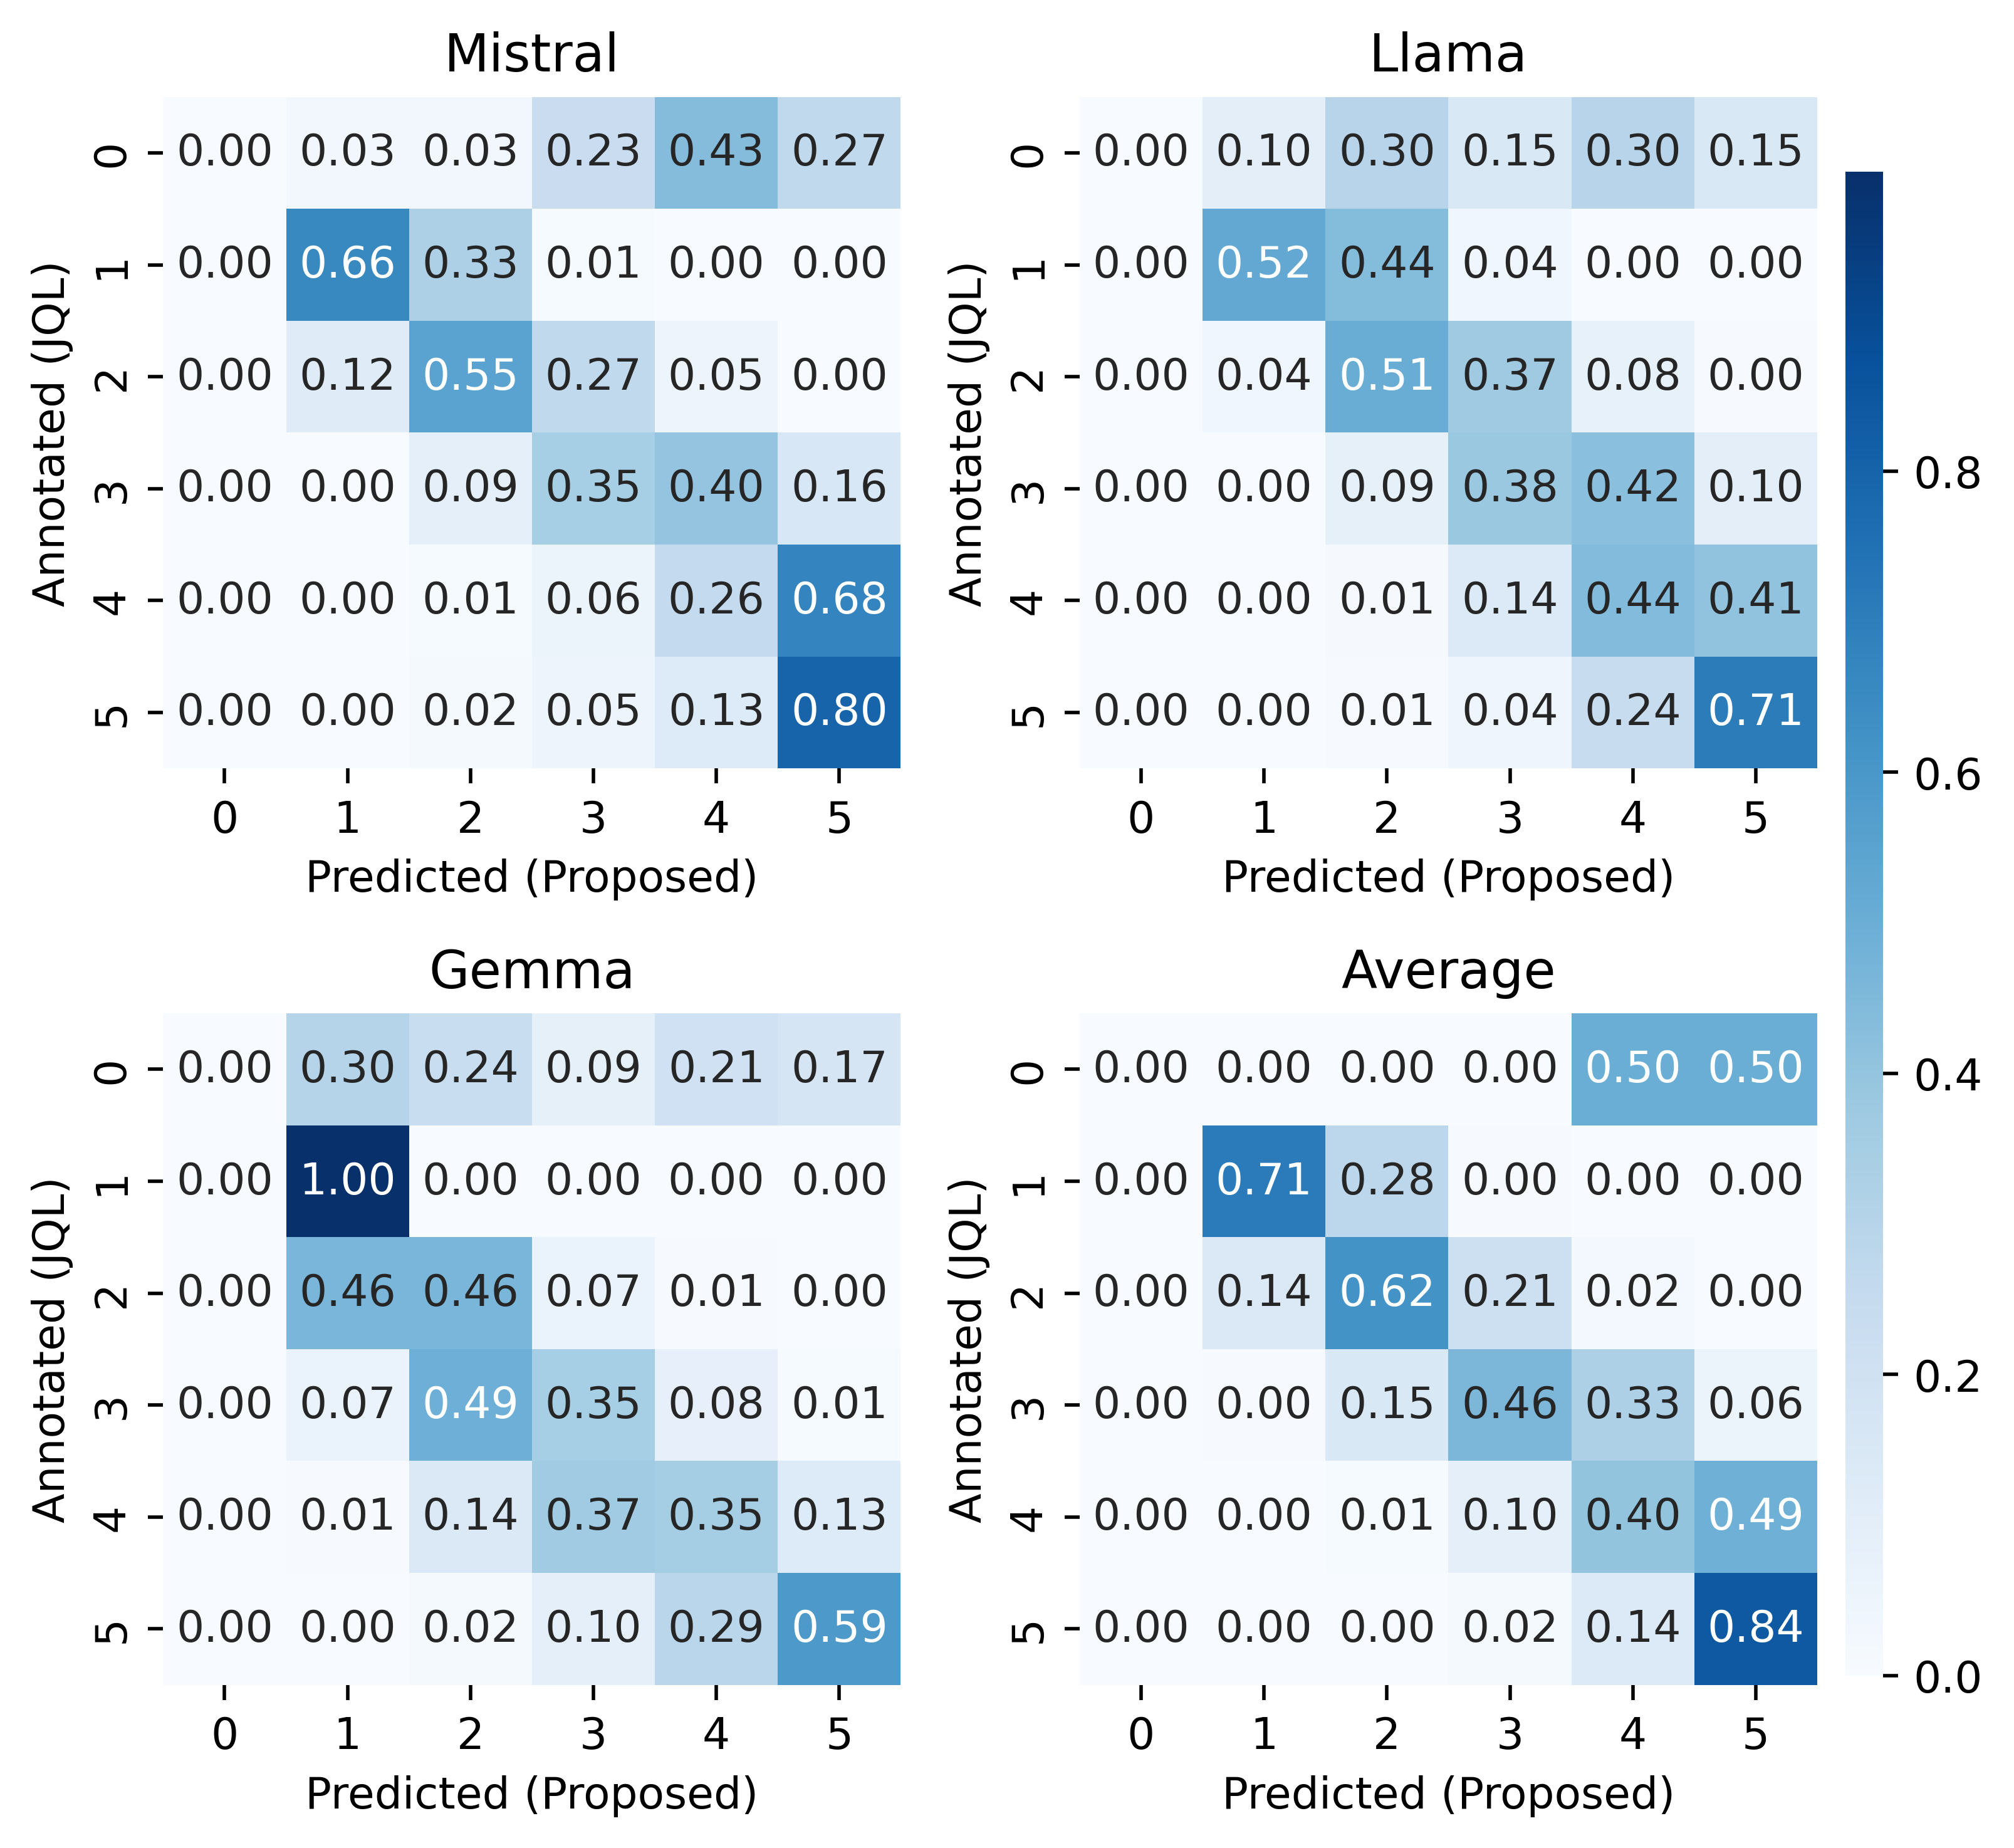

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

humans = np.array([
    [47, 84, 29, 15, 11, 0],
    [0, 12, 29, 38, 19, 2],
    [0, 3, 12, 37, 54, 0],
    [0, 0, 1, 21, 82, 0],
    [0, 0, 0, 4, 9, 0],
    [0, 0, 0, 0, 2, 0]
])

mistral = np.array([
    [0, 1, 1, 7, 13, 8, 0],
    [0, 106281, 53501, 1711, 54, 1, 0],
    [0, 31096, 143708, 69623, 14166, 989, 2],
    [0, 152, 6403, 24593, 28078, 11142, 22],
    [0, 4, 67, 402, 1868, 4925, 26],
    [0, 0, 15, 46, 110, 674, 19],
    [0, 0, 8, 6, 5, 6, 0]
])

llama = np.array([
    [0, 2, 6, 3, 6, 3, 0],
    [0, 130817, 109473, 8967, 731, 5, 0],
    [0, 6638, 89596, 65886, 14295, 753, 0],
    [0, 71, 4405, 19289, 21213, 5147, 6],
    [0, 5, 174, 1870, 6071, 5568, 13],
    [0, 0, 41, 344, 1878, 5532, 31],
    [0, 1, 8, 29, 100, 737, 19]
])

gemma = np.array([
    [0, 138, 109, 40, 94, 77, 0],
    [0, 2778, 3, 0, 0, 0, 0],
    [0, 125216, 125283, 18811, 2056, 136, 0],
    [0, 8877, 67087, 47510, 11576, 1212, 2],
    [0, 521, 11043, 29023, 27572, 10222, 33],
    [0, 3, 176, 991, 2972, 6024, 32],
    [0, 1, 2, 13, 24, 74, 2]
])

average = np.array([
    [0, 0, 0, 0, 2, 2, 0],
    [0, 102501, 40649, 594, 22, 0, 0],
    [0, 34665, 148818, 51617, 5556, 236, 0],
    [0, 366, 14037, 42256, 30542, 5148, 6],
    [0, 1, 189, 1851, 7681, 9362, 31],
    [0, 1, 9, 68, 488, 2968, 31],
    [0, 0, 1, 2, 3, 29, 1]
])

def normalize_cm(cm):
    cm = cm[0:6, 0:6]
    return cm.astype(float) / cm.sum(axis=1, keepdims=True)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
cms = [mistral, llama, gemma, average]
names = ["Mistral", "Llama", "Gemma", "Average"]

normed_cms = [normalize_cm(c) for c in cms]
vmin = min(cm_.min() for cm_ in normed_cms)
vmax = max(cm_.max() for cm_ in normed_cms)
cbar_ax = fig.add_axes([0.99, 0.1, 0.02, 0.8])

for i, (ax, cm_, name_) in enumerate(zip(axes.flat, normed_cms, names)):
    sns.heatmap(cm_, annot=True, fmt='.2f', cmap='Blues', ax=ax, vmin=vmin, vmax=vmax,
                cbar=(i == 0), cbar_ax=None if i else cbar_ax)
    ax.set_title(name_)
    ax.set_xlabel('Predicted (Proposed)')
    ax.set_ylabel('Annotated (JQL)')

plt.tight_layout()
# plt.savefig('../photos/jql_conf_mat.png', dpi=500)
plt.show()